In [2]:
from windisch import *
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [31]:
update_input_parameters()
tip = TurbinesInputParameters()
tip.static()
tip.stochastic(500)
_, array = fill_xarray_from_input_parameters(tip, scope={"year": [2020, 2030], "application": ["onshore"],})

#array = array.interp(size=1200)


In [32]:
array

<xarray.DataArray (size: 5, application: 1, parameter: 59, year: 2, value: 500)>
array([[[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ]],

         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ]],

         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ]],

         ...,

         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
...
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ]],

         ...,

         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ]],

         [[41.82381062, 48.695034  , 46.79828283, ..., 43.35695059,
           55.48838671, 49.03348658],
          [56.55394378, 51.95456178, 53.08392516, ..., 57.13977906,
           52.67791057, 44.61231238]],

         [[31.3554653 , 31.51052313, 30.89343176, ..., 27.01083105,
           29.48258901, 29.12918066],
          [32.83419735, 32.08946461, 30.64499523, ..., 28.20566978,
           28.04578387, 28.02368621]]]]])
Coordinates:
  * size         (size) int64 100 500 1000 3000 8000
  * application  (application) <U7 'onshore'
  * parameter    (parameter) <U36 'access road' ... 'turbines per farm'
  * year         (year) int64 2020 2030
  * value        (value) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499

In [15]:
array.sel(parameter="tower transport to site", application="onshore", year=2020, size="1000kW")

<xarray.DataArray (value: 1)>
array([9150.])
Coordinates:
    size         <U6 '1000kW'
    application  <U8 'onshore'
    parameter    <U36 'tower transport to site'
    year         int64 2020
  * value        (value) int64 0

In [13]:
wt = WindTurbineModel(array)

In [14]:
wt.array

<xarray.DataArray (size: 5, application: 2, parameter: 59, year: 6, value: 500)>
array([[[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ]],

         [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
            0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        , ...,  0.        ,
...
           51.06943487, 53.15056671],
          [43.12818455, 51.6567207 , 51.01058886, ..., 57.11484359,
           49.72578184, 47.11103729],
          [49.36674535, 50.64961639, 50.98358514, ..., 48.23022071,
           45.28221292, 51.85325582],
          [47.85019611, 53.77885554, 47.98239826, ..., 47.56243507,
           53.28037641, 43.46482476]],

         [[33.66740102, 29.23217883, 31.8205468 , ..., 28.16428636,
           26.45444445, 26.42178182],
          [26.88678449, 29.74292351, 30.17887235, ..., 29.41990337,
           29.58650199, 29.96572107],
          [28.86607819, 28.22865397, 30.95034607, ..., 31.1427676 ,
           26.32279445, 33.35750798],
          [31.10416335, 33.13765073, 30.5236188 , ..., 29.35922743,
           31.87804513, 31.25962813],
          [29.14682033, 29.31431272, 27.14178092, ..., 29.00646871,
           28.32640766, 32.73243645],
          [28.9763023 , 31.81570686, 30.10836327, ..., 29.83366939,
           29.52371464, 31.92722783]]]]])
Coordinates:
  * size         (size) int64 100 500 1000 3000 8000
  * application  (application) <U8 'offshore' 'onshore'
  * parameter    (parameter) <U36 'access road' ... 'turbines per farm'
  * year         (year) int64 2000 2010 2020 2030 2040 2050
  * value        (value) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499

In [15]:
wt.set_all()

In [18]:
wt.array.shape

(5, 2, 59, 6, 500)

<AxesSubplot: xlabel='size,application'>

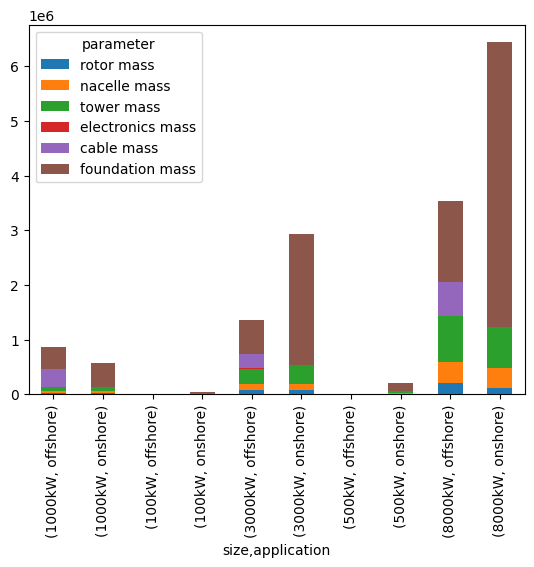

In [21]:
list_mass = [
    "rotor mass",
    "nacelle mass",
    "tower mass",
    "electronics mass",
    "cable mass",
    "foundation mass",
]
wt.array.sel(year=2020, value=0, parameter=list_mass).to_dataframe("val").unstack()["val"].plot(kind="bar", stacked=True)

In [24]:
wt.array.coords

Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
  * parameter    (parameter) <U36 'access road' ... 'turbines per farm'
  * year         (year) int64 2000 2010 2020 2030 2040 2050
  * value        (value) int64 0

In [22]:
wt.array.sel(year=2020, value=0, parameter="maintenance transport").to_dataframe("val").unstack()["val"]

application,offshore,onshore
size,,
1000kW,256779.661017,6250.0
100kW,0.000000,6250.0
3000kW,256779.661017,6250.0
500kW,0.000000,6250.0
8000kW,256779.661017,6250.0


<AxesSubplot: >

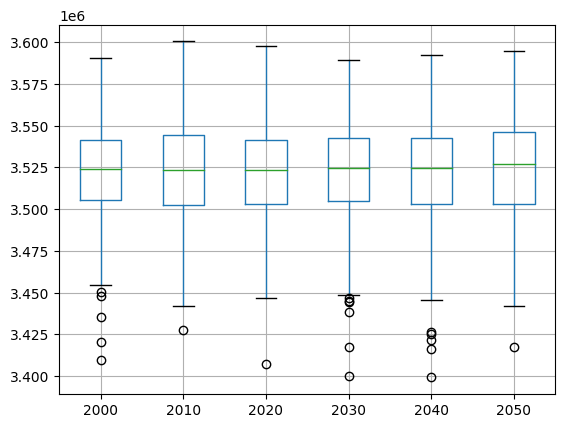

In [34]:
wt.array.sel(parameter="total mass", application="offshore", size="8000kW").to_dataframe("val").unstack()["val"].T.boxplot()

In [6]:
from windisch.model import func_tower_weight_d2h
func_tower_weight_d2h(5, 10, 3.03584782e-04, 9.68652909e00)

9762.425285500001

In [7]:
func_tower_weight_d2h(wt["rotor diameter"], wt["tower height"], 3.03584782e-04, 9.68652909e00)

<xarray.DataArray (size: 5, application: 2, year: 6, value: 1)>
array([[[[ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306]],

        [[ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994]]],


       [[[  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
...
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168]]],


       [[[840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929]],

        [[754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841]]]])
Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
  * year         (year) int64 2000 2010 2020 2030 2040 2050
  * value        (value) int64 0
    tower mass   (size, application, year, value) float64 7.337e+04 ... 7.545...

In [6]:
wt.array.sel(year=2020, value=0, parameter="tower mass")

<xarray.DataArray (size: 5, application: 2)>
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])
Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
    parameter    <U36 'tower mass'
    year         int64 2020
    value        int64 0